In [1]:
import pandas as pd
import numpy as np

In [2]:
link = "https://www.bbc.com/sport/football/french-ligue-one/table"

In [3]:
league_data = pd.read_html(link)[0]

In [4]:
league_data = league_data.loc[0:19,"Team":"Pts"]
league_data

,Team,P,W,D,L,F,A,GD,Pts
0,Rennes,3,2,1,0,7,4,3,7
1,Monaco,3,2,1,0,5,3,2,7
2,Lille,3,2,1,0,3,1,2,7
3,Saint-Ãtienne,2,2,0,0,4,0,4,6
4,Marseille,2,2,0,0,4,2,2,6
5,Lens,3,2,0,1,5,4,1,6
6,Nice,3,2,0,1,5,4,1,6
7,Angers,3,2,0,1,2,2,0,6
8,Bordeaux,3,1,2,0,2,0,2,5
9,Lyon,2,1,1,0,4,1,3,4


In [5]:
league_data.set_index("Team",inplace=True)

In [6]:
features = ["P","W","D","L","F","A","GD","Pts"]

for feature in features:
    league_data[feature] = league_data[feature].astype("int")
    
    

## Feature Engineering

In [7]:
league_data["win_ratio"] = round(league_data.W/league_data.P,2)

In [8]:
league_data["draw_ratio"] = round(league_data.D/league_data.P,2)

In [9]:
league_data["loss_ratio"] = round(league_data.L/league_data.P,2)

In [10]:
league_data["goals_scored_per_game_ratio"] = round((league_data.F/league_data.P),2)

In [11]:
league_data["total_goals_per_game_ratio"] = round(((league_data.F + league_data.A)/league_data.P),2)

In [12]:
league_data.replace(np.inf, 0,inplace=True)

In [13]:
league_data.fillna(0,inplace=True)

In [14]:
league_data

,P,W,D,L,F,A,GD,Pts,win_ratio,draw_ratio,loss_ratio,goals_scored_per_game_ratio,total_goals_per_game_ratio
Team,,,,,,,,,,,,,
Rennes,3,2,1,0,7,4,3,7,0.67,0.33,0.00,2.33,3.67
Monaco,3,2,1,0,5,3,2,7,0.67,0.33,0.00,1.67,2.67
Lille,3,2,1,0,3,1,2,7,0.67,0.33,0.00,1.00,1.33
Saint-Ãtienne,2,2,0,0,4,0,4,6,1.00,0.00,0.00,2.00,2.00
Marseille,2,2,0,0,4,2,2,6,1.00,0.00,0.00,2.00,3.00
Lens,3,2,0,1,5,4,1,6,0.67,0.00,0.33,1.67,3.00
Nice,3,2,0,1,5,4,1,6,0.67,0.00,0.33,1.67,3.00
Angers,3,2,0,1,2,2,0,6,0.67,0.00,0.33,0.67,1.33
Bordeaux,3,1,2,0,2,0,2,5,0.33,0.67,0.00,0.67,0.67


In [15]:
import matplotlib.pyplot as plt

## Win Ratios

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


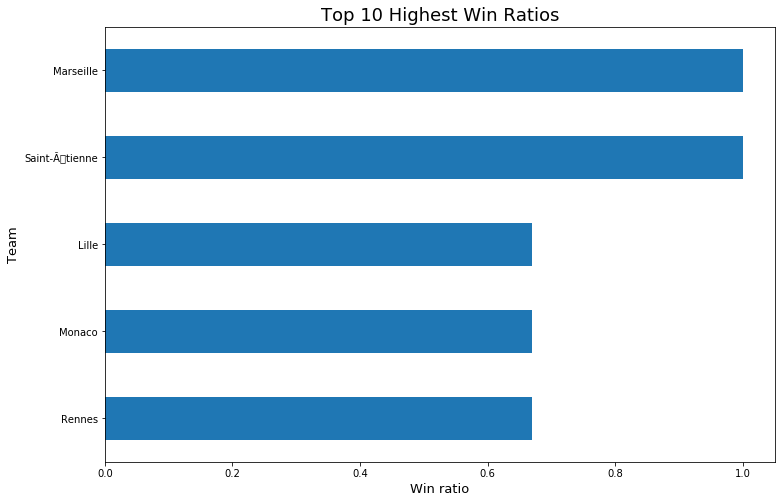

In [16]:
league_data.win_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Win ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Win Ratios",fontsize=18)
plt.show()


## Draw Ratios

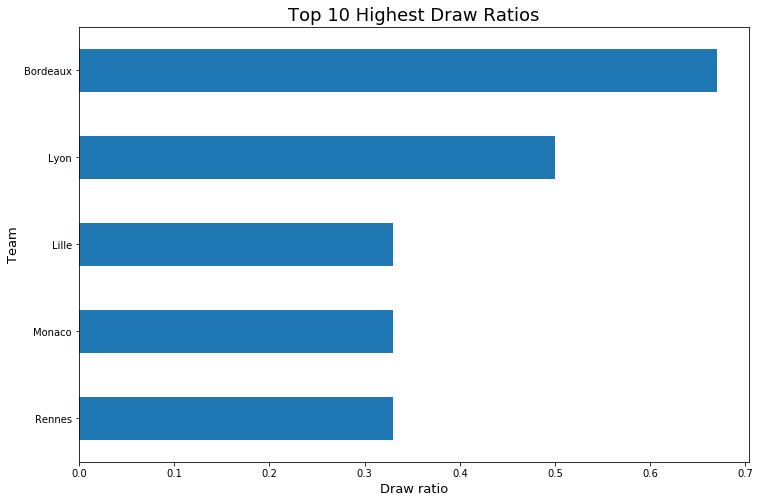

In [17]:
league_data.draw_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Draw ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Draw Ratios",fontsize=18)
plt.show()

## Loss Ratios

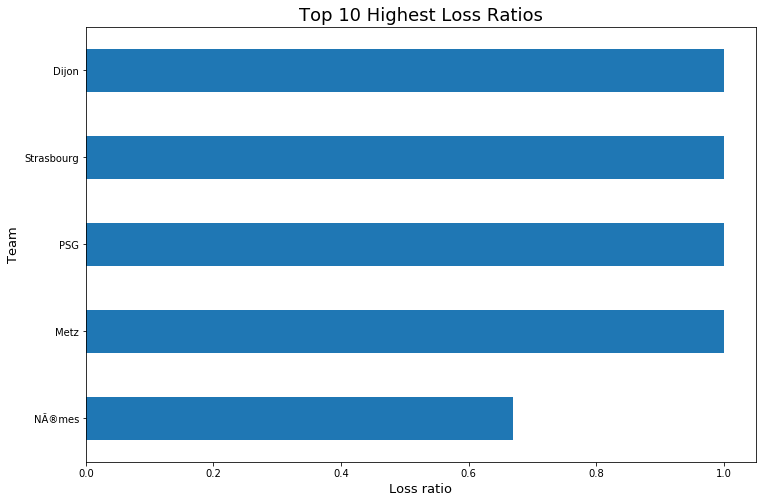

In [18]:
league_data.loss_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Loss ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Loss Ratios",fontsize=18)
plt.show()

## High Scoring Teams

In [19]:
high_scoring_teams = league_data["goals_scored_per_game_ratio"]
high_scoring_teams = high_scoring_teams.nlargest(5).to_frame()
high_scoring_teams

,goals_scored_per_game_ratio
Team,
Rennes,2.33
NÃ®mes,2.33
Saint-Ãtienne,2.00
Marseille,2.00
Lyon,2.00


In [20]:
high_goals_averaging_teams = league_data["total_goals_per_game_ratio"]
high_goals_averaging_teams = high_goals_averaging_teams.nlargest(5).to_frame()
high_goals_averaging_teams

,total_goals_per_game_ratio
Team,
NÃ®mes,4.33
Rennes,3.67
Lorient,3.67
Brest,3.67
Montpellier,3.50
